#Adding Required Libraries

In [1]:
!pip install matplotlib --upgrade

In [2]:
!pip install tensorflow --upgrade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Data Set

In [4]:
train = pd.read_csv("COVID19_train_N3_S5.csv",encoding='ISO-8859-1')
test = pd.read_csv("COVID19_test_N3_S5.csv",encoding='ISO-8859-1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41143 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [6]:
train.head()

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia: woolworths to give elde...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me, ready to go at supermarket during the covi...",Extremely Negative


#Cleaning Data Set

##Deleting Nan Rows

In [7]:
train.isnull().sum(axis = 0)

OriginalTweet    14
Sentiment         0
dtype: int64

In [8]:
test.isnull().sum(axis = 0)

OriginalTweet    0
Sentiment        0
dtype: int64

In [9]:
train.dropna(subset = ["OriginalTweet"],inplace= True)

Before cleaning the Dataset, let's perform a normalization process that we forgot about. Also some tweets have multiple question marks we should normalize this tweets too.

##Normalizing non-ascii characters

In [10]:
def remove_non_ascii(tweet):
    return "".join(c for c in tweet if ord(c)<128)

In [11]:
tweet = "covid-19 wonÃ¢Â’t be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Â’s necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Â’t be a surprise."
print("Tweet Before\n",tweet)
tweet = remove_non_ascii(tweet)
print("Tweet After\n",tweet)

Tweet Before
 covid-19 wonÃ¢Â’t be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Â’s necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Â’t be a surprise.
Tweet After
 covid-19 wont be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if its necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnt be a surprise.


In [12]:
def remove_mult_QM(tweet):
  if tweet.count('?') > 5:
    return tweet.replace('?','')
  else:
    return tweet

In [13]:
tweet = "join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??"
print("Tweet Before\n",tweet)
tweet = remove_mult_QM(tweet)
print("Tweet After\n",tweet)

Tweet Before
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??
Tweet After
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by   , we explore ' ,   ' register here 


In [14]:
def remove_mult_spaces(tweet):
#Some tweets consist of only ?. That is why the try except structure was used.
  try:
    return re.sub("\s\s+" , " ", tweet)
  except:
    return tweet

In [15]:
def normalize(tweet):
  tweet = remove_non_ascii(tweet)
  tweet = remove_mult_QM(tweet)
  tweet = remove_mult_spaces(tweet)
  return tweet

In [16]:
tweet = "This is a test tweet ???????"
print("Tweet Before\n",tweet)
tweet = normalize(tweet)
print("Tweet After\n",tweet)

Tweet Before
 This is a test tweet ???????
Tweet After
 This is a test tweet 


In [17]:
for i in range(len(train)):
  train.iloc[i]["OriginalTweet"] = normalize(train.iloc[i]["OriginalTweet"])

In [18]:
for i in range(len(test)):
  test.iloc[i]["OriginalTweet"] = normalize(test.iloc[i]["OriginalTweet"])

##Tweet Lenghts

In [19]:
train_lens = []
for tweet in train["OriginalTweet"]:
  tweet_len = len(tweet.split())
  train_lens.append(tweet_len)
train["tweet_len"] = train_lens

In [20]:
test_lens = []
for tweet in test["OriginalTweet"]:
  tweet_len = len(tweet.split())
  test_lens.append(tweet_len)
test["tweet_len"] = test_lens

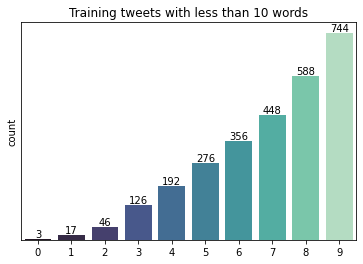

In [21]:
ax = sns.countplot(x='tweet_len',data=train[train['tweet_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

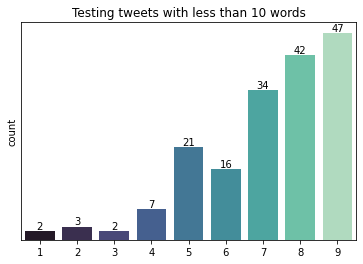

In [22]:
ax = sns.countplot(x='tweet_len',data=test[test['tweet_len']<10], palette='mako')
plt.title('Testing tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [23]:
data=train[train['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
0,and and,Neutral,2
16,13,Neutral,1
255,binge shopping online,Neutral,3
397,:,Neutral,1
602,this is kind,Positive,3
...,...,...,...
40242,toilet tissue laughs.,Positive,3
40893,together we can,Neutral,3
41054,supermarket madness!,Negative,2
41065,back to basics,Neutral,3


In [24]:
train = train[train["tweet_len"]>4]

In [25]:
data=test[test['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
1940,supermarket rationing!,Neutral,2
2208,good morning,Positive,2
3040,1 meter rule,Neutral,3
3066,@,Neutral,1
3195,@,Neutral,1
3332,thats good advice.,Positive,3
3368,selfish wankpuffins,Negative,2


In [26]:
test = test[test["tweet_len"]>4]

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40759 entries, 1 to 41156
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  40759 non-null  object
 1   Sentiment      40759 non-null  object
 2   tweet_len      40759 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


#BERT

##Adding Required Libraries

In [28]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 35.1 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [29]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

import numpy as np

import re,string

##Tokenizing

In [30]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [31]:
train_token_lens = []
total = 0
for i,tweet in enumerate(train["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    train_token_lens.append(len(tokens))
    if len(tokens)>90:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT:\n{tweet}")
        total += 1
print("Total of tweets: ",total)

INDEX: 1620, TOKEN: 98, TEXT:
zsah policie proti spekulantm s roukami. na mj popud hejtman steckho kraje ve spoluprci s podle krizovho zkona zajistil tm 700 tis.rouek od firmy, kter je mla dodat na zdravotnkm, ale na posledn chvli se snaila navyovat cenu.
INDEX: 4619, TOKEN: 92, TEXT:
aldi: 9 a.m.-7 p.m. giant eagle/market district/getgo: 7 a.m.-10 p.m. trader joes: 9 a.m.-7 p.m. walmart: 6 a.m.-11 p.m. check out the full list of adjusted hours in response to the covid-19 pandemic for local grocery stores and supermarkets here.
INDEX: 7535, TOKEN: 97, TEXT:
the dominos fall: coronavirus gt; world healthemergency gt; consumer and supplychain resources shut down gt; economy stalls gt; credit cracks ( cc ) gt; liquidity shock ( ls ) gt; unemployment gt; 2x ( cc gt; ls ) gt; spx and bonds crash ( sbc ) gt; 3x ( -1 ( sbc * (2x(cc gt;ls)) = dominos )
INDEX: 16472, TOKEN: 97, TEXT:
bir mddettir spermarketlerin lojistik hizmeti avusturya ordusu desteiyle yaplyor. dn corona tedavisi iin 22 mily

In [33]:
train["Token_lens"] = train_token_lens

In [34]:
train = train[train["Token_lens"]<90]

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40753 entries, 1 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  40753 non-null  object
 1   Sentiment      40753 non-null  object
 2   tweet_len      40753 non-null  int64 
 3   Token_lens     40753 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [36]:
test_token_lens = []
total = 0
for i,tweet in enumerate(test["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    test_token_lens.append(len(tokens))
    if len(tokens)>90:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT: {tweet}")
        total += 1
print("Total of tweets: ",total)

INDEX: 286, TOKEN: 103, TEXT: so hard to decide??. as much as i want to hodl my 2 ccdcv4 token. our place is declared to lock down due to covid-19. i will use this to buy some food to stock. txnid:093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f my b
INDEX: 345, TOKEN: 92, TEXT: informoval jsem zstupce vech obchodnch etzc o aktulnch opatench vldy. etzce jsou zsobovny na 95 %, take nen dvod panikait. zsoby potravin fakt nedojdou. nen opravdu dvod dnes obsadit a vykoupit supermarkety.
INDEX: 2376, TOKEN: 103, TEXT: ahora seguid llorando por el papel higinico (que no he comprado porque an tengo), seguid creando histeria y preocupacin poniendo fotos de gente en pnico y estanteras vacas, que yo seguir yendo a comercios responsables, de barrio, donde nos cuidan, hoy y siempre. gracias.
INDEX: 3127, TOKEN: 93, TEXT: gdi i need keep in mind that food at home is for covid-19 food stock not for midnight snacks :))))))))))))))))))))))))))))))) i need to hit the gym again gdi, it's

In [37]:
test["Token_lens"] = test_token_lens

In [38]:
test = test[test["Token_lens"]<90]

In [39]:
train = train.sort_values(by = "Token_lens",ascending=False)
train.head(20)

,OriginalTweet,Sentiment,tweet_len,Token_lens
40999,company withdraws fiscal 2020 financial guidan...,Positive,35,89
29784,"at black jackals dorm, after watching tv about...",Negative,45,89
18913,croozefmnews president museveni has ordered t...,Extremely Negative,42,88
14593,"na, wer war denn da am werk? gestern nachmitta...",Extremely Negative,37,88
14582,hiked prices in the face of the covid-19 crise...,Negative,47,87
29683,some encouraging data from governor cuomos dai...,Extremely Positive,40,87
4844,impct of coronavirus i hve sen hw civilizd ppl...,Extremely Negative,48,86
11213,keine wertgegenstnde im fahrzeug lassen! - die...,Negative,34,85
12389,"okay, so i just checked the drug prices for pl...",Positive,38,85
36671,"when covid-19 is done, which industry do you t...",Negative,48,85


In [40]:
train = train.iloc[8:]

The dataset looks more clean now. We will shuffle it and reset the index.

In [41]:
train = train.sample(frac=1).reset_index(drop=True)

In [42]:
test = test.sort_values(by = "Token_lens",ascending=False)
test.head(20)

,OriginalTweet,Sentiment,tweet_len,Token_lens
1491,"dang these people are out of control, i'll tel...",Neutral,52,85
88,"stay vigilant, stay safe. as we adapt to covid...",Negative,38,83
1209,im in the dc/maryland/virginia (dmv) area amp;...,Positive,46,82
2366,ok.......i've had enough. the grocery store to...,Extremely Negative,49,82
1218,legit question as a small retail business own...,Extremely Negative,51,82
452,i need people to be less stupid about covid-19...,Extremely Negative,51,81
1485,dtf-dont touch face dwbh-do wash both hands gt...,Extremely Negative,41,81
2420,covid-19 is causing an extreme amount of panic...,Extremely Negative,54,79
259,5 stages of covid-19 denial - it's just a bad ...,Extremely Negative,54,79
3645,"i'm so over rude people on the bus, in the sup...",Extremely Negative,52,78


Test datas seems OK

In [43]:
test = test.sample(frac=1).reset_index(drop=True)

##Train - Validation - Test Split

In [44]:
X = train['OriginalTweet'].values
y = train['Sentiment'].values

In [45]:
seed = 42

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [47]:
X_test = test['OriginalTweet'].values
y_test = test['Sentiment'].values

##Label Encoding

In [48]:
def label_encoding(data):
  label = preprocessing.LabelEncoder()
  y = label.fit_transform(data)
  y = to_categorical(y)
  return y

In [49]:
y_valid = label_encoding(y_valid)
y_test = label_encoding(y_test)
y_train = label_encoding(y_train)

In [50]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

## Sentiment Analysis

In [51]:
MAX_LEN=128

In [52]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [53]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

##Modeling

In [54]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [55]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(5, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [56]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [57]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1146/1146 [==============================] - 1813s 2s/step - loss: 0.9360 - categorical_accuracy: 0.6112 - val_loss: 0.6315 - val_categorical_accuracy: 0.7517
Epoch 2/4
1146/1146 [==============================] - 1792s 2s/step - loss: 0.5231 - categorical_accuracy: 0.8084 - val_loss: 0.5181 - val_categorical_accuracy: 0.8010
Epoch 3/4
1146/1146 [==============================] - 1788s 2s/step - loss: 0.3724 - categorical_accuracy: 0.8693 - val_loss: 0.4072 - val_categorical_accuracy: 0.8584
Epoch 4/4
1146/1146 [==============================] - 1781s 2s/step - loss: 0.2870 - categorical_accuracy: 0.9019 - val_loss: 0.4166 - val_categorical_accuracy: 0.8547


#Bert Results

In [58]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [59]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [66]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(15,15))
    labels=['Extremly Negative','Negative', 'Neutral', 'Positive','Extremly Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [61]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

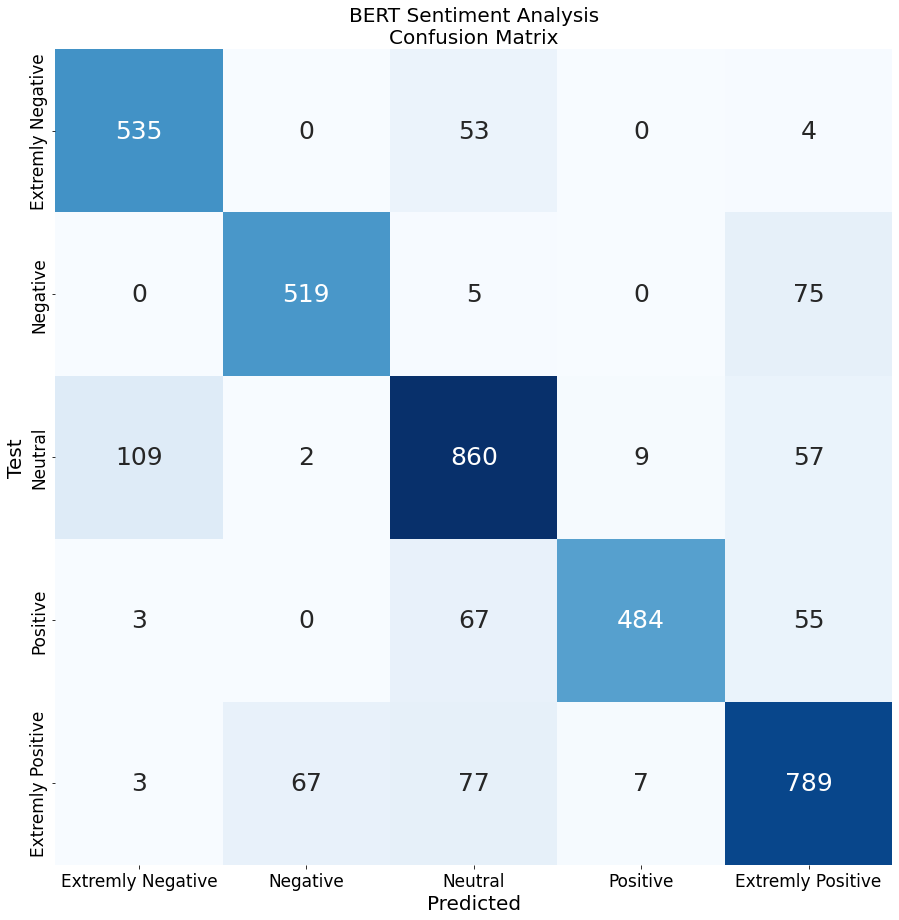

In [67]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [63]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Extremely Negative','Negative', 'Neutral', 'Positive','Extremely Positive']))

	Classification Report for BERT:

                     precision    recall  f1-score   support

Extremely Negative       0.82      0.90      0.86       592
          Negative       0.88      0.87      0.87       599
           Neutral       0.81      0.83      0.82      1037
          Positive       0.97      0.79      0.87       609
Extremely Positive       0.81      0.84      0.82       943

         micro avg       0.84      0.84      0.84      3780
         macro avg       0.86      0.85      0.85      3780
      weighted avg       0.85      0.84      0.84      3780
       samples avg       0.84      0.84      0.84      3780

